**CS5002: Programming Principles and Practice**

**Practical P3: Data analysis and visualisation Python**

In [1]:
import json
import pandas as pd

In [2]:
df = pd.read_csv("../data/Scotland_teaching_file_1PCT.csv")

In [3]:
df

,Record_Number,Region,RESIDENCE_TYPE,Family_Composition,sex,age,Marital_Status,student,Country_Of_Birth,health,Ethnic_Group,religion,Economic_Activity,Occupation,industry,Hours_Worked_Per_Week,Approximate_Social_Grade
0,1,S92000003,P,1,1,4,2,2,2,2,1,5,1,5,5,4,3
1,2,S92000003,P,0,1,3,1,2,1,2,1,1,1,1,8,3,2
2,3,S92000003,P,1,2,4,2,2,1,3,1,1,1,4,8,2,4
3,4,S92000003,P,1,2,6,2,2,1,1,1,1,1,2,8,4,2
4,5,S92000003,P,4,2,4,4,2,1,2,1,1,1,3,11,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63383,63384,S92000003,P,1,1,2,1,1,1,1,1,2,6,X,X,X,3
63384,63385,S92000003,P,1,1,4,2,2,1,1,1,1,1,3,9,3,2
63385,63386,S92000003,P,1,1,5,2,2,1,1,1,9,1,8,3,4,4
63386,63387,S92000003,P,4,2,1,1,1,1,1,1,9,X,X,X,X,X


Next, we read the JSON file with the interpretations of categories.

In [4]:
with open("../data/data_dictionary.json", "r") as read_file:
    labels = json.load(read_file)

In [5]:
labels

{'RESIDENCE_TYPE': {'C': 'Resident in a Communal Establishment',
  'P': 'Not resident in a Communal Establishment'},
 'Family_Composition': {'0': 'Not in a family',
  '1': 'Married/same-sex civil partnership couple family',
  '2': 'Cohabiting couple family',
  '3': 'Lone parent family (male head)',
  '4': 'Lone parent family (female lead)',
  '5': 'Other related family',
  'X': 'No code required (residents of a communal establishment)'},
 'Age': {'1': '0 to 15',
  '2': '16 to 24',
  '3': '25 to 34',
  '4': '35 to 44',
  '5': '45 to 54',
  '6': '55 to 64',
  '7': '65 to 74',
  '8': '75 and over'},
 'Approximate_Social_Grade': {'1': 'AB',
  '2': 'C1',
  '3': 'C2',
  '4': 'DE',
  'X': 'No code required ( People aged under 16 and people resident in communal establishments)'},
 'Country_Of_Birth': {'1': 'UK', '2': 'Non UK'},
 'Economic_Activity': {'1': 'Economically active: Employed',
  '2': 'Economically active: Self-Employed',
  '3': 'Economically active: Unemployed',
  '4': 'Economically

In [6]:
labels['Family_Composition']['0']

'Not in a family'

# Refine data
The `refine_data` function ensures the dataset is clean and consistent by:
1. Validating that categorical variables contain only admissible values.
2. Ensuring numerical variables fall within specified ranges.
3. Removing duplicate rows to avoid redundancy.

The refined dataset is saved to a new file for further analysis.


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def load_data(file_path):
    """
    Load the dataset from the specified file path.
    """
    return pd.read_csv(file_path)

def refine_data(data, admissible_values, ranges, output_path):
    """
    Refine the dataset:
    1. Check variable formats and values.
    2. Remove duplicates.
    3. Save refined dataset to a new file.

    Args:
        data (DataFrame): Original dataset.
        admissible_values (dict): Expected admissible values for categorical variables.
        ranges (dict): Expected ranges for numerical variables.
        output_path (str): Path to save the refined dataset.
    """
    refined_data = data.copy()

    # Check formats and admissible values
    for column, valid_values in admissible_values.items():
        refined_data[column] = refined_data[column].where(refined_data[column].isin(valid_values), pd.NA)

    # Check numerical ranges
    for column, (min_val, max_val) in ranges.items():
        refined_data[column] = refined_data[column].where(
            (refined_data[column] >= min_val) & (refined_data[column] <= max_val), pd.NA
        )

    # Remove duplicates
    refined_data = refined_data.drop_duplicates()

    # Save refined data
    refined_data.to_csv(output_path, index=False)
    print(f"Refined data saved to: {output_path}")

    return refined_data

# Descriptive analysis
The `descriptive_analysis` function provides a summary of the dataset, including:
1. The total number of records.
2. The data type of each column.
3. Unique values and their counts for each variable (excluding "Record_Number" and "Region").

This step provides insights into the structure and content of the dataset.


In [8]:
def descriptive_analysis(data):
    """
    Perform descriptive analysis on the dataset.
    """
    # Total number of records
    total_records = len(data)
    print(f"Total records: {total_records}")

    # Variable types
    variable_types = data.dtypes
    print("\nVariable Types:\n", variable_types)

    # Unique values and occurrences for each variable
    unique_values = {}
    for col in data.columns:
        if col not in ["Record_Number", "Region"]:
            unique_values[col] = data[col].value_counts()
    return total_records, variable_types, unique_values


# Plot bar chart
The `plot_bar_chart` function generates bar charts to visualize the distribution of values in specific categorical variables.

1. Number of records by age group.
2. Number of records by occupation.

Bar charts help identify patterns or outliers in categorical data.


Refined data saved to: ../data/refined_data.csv
Total records: 63388

Variable Types:
 Record_Number                int64
Region                      object
RESIDENCE_TYPE              object
Family_Composition          object
sex                          int64
age                          int64
Marital_Status               int64
student                      int64
Country_Of_Birth             int64
health                       int64
Ethnic_Group                 int64
religion                     int64
Economic_Activity           object
Occupation                  object
industry                    object
Hours_Worked_Per_Week       object
Approximate_Social_Grade    object
dtype: object

Unique Values and Counts:
 {'RESIDENCE_TYPE': RESIDENCE_TYPE
P    62239
C     1149
Name: count, dtype: int64, 'Family_Composition': Family_Composition
1    33337
0    11716
4     7757
2     7660
3     1019
5      750
Name: count, dtype: int64, 'sex': sex
2    32696
1    30692
Name: count, dtype: int64,

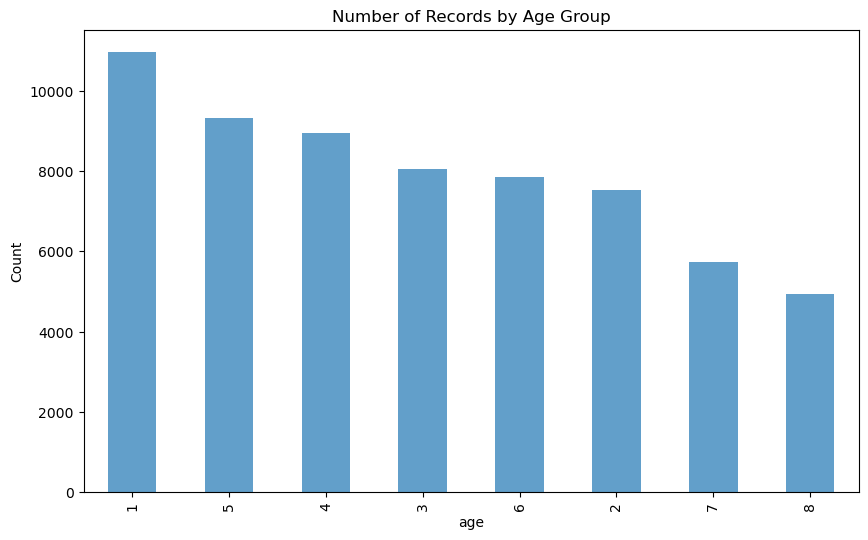

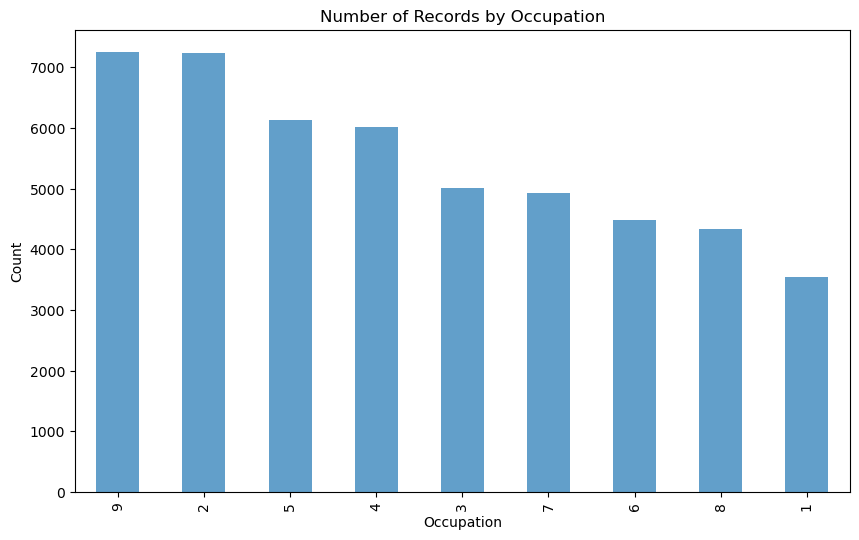

In [9]:
def plot_bar_chart(data, column, title):
    """
    Plot a bar chart for a categorical variable.
    """
    plt.figure(figsize=(10, 6))
    data[column].value_counts().plot(kind='bar', alpha=0.7)
    plt.title(title)
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.show()
    
if __name__ == "__main__":
    # File paths
    input_path = "../data/Scotland_teaching_file_1PCT.csv"
    output_path = "../data/refined_data.csv"

    # Load data
    data = load_data(input_path)

    # Define admissible values and ranges
    admissible_values = {
        "RESIDENCE_TYPE": ["P", "C"],
        "Family_Composition": ["1", "0", "2", "3", "4", "5"],
        "Economic_Activity": ["1", "2", "3", "4", "5", "6", "7", "8", "9"],
        "Occupation": ["1", "2", "3", "4", "5", "6", "7", "8", "9"],
        "industry": ["1", "2", "3", "4", "5", "6", "7", "8", "9", "10", "11", "12", "13"],
        "Hours_Worked_Per_Week": ["1", "2", "3", "4"],
        "Approximate_Social_Grade": ["1", "2", "3", "4"]
    }

    ranges = {
        "age": (1, 8),
        "health": (1, 5),
        "student": (1, 2),
        "Ethnic_Group": (1, 6),
        "religion": (1, 9),
        "Country_Of_Birth": (1, 2),
    }

    # Refine data
    refined_data = refine_data(data, admissible_values, ranges, output_path)

    # Descriptive analysis
    total_records, variable_types, unique_values = descriptive_analysis(refined_data)
    print("\nUnique Values and Counts:\n", unique_values)

    # Visualizations
    plot_bar_chart(refined_data, "age", "Number of Records by Age Group")
    plot_bar_chart(refined_data, "Occupation", "Number of Records by Occupation")


# Data Visualization: Pie Chart Analysis
- pie chart for the percentage of records for each general health descriptor;
- pie chart for the percentage of records for each ethnic group.


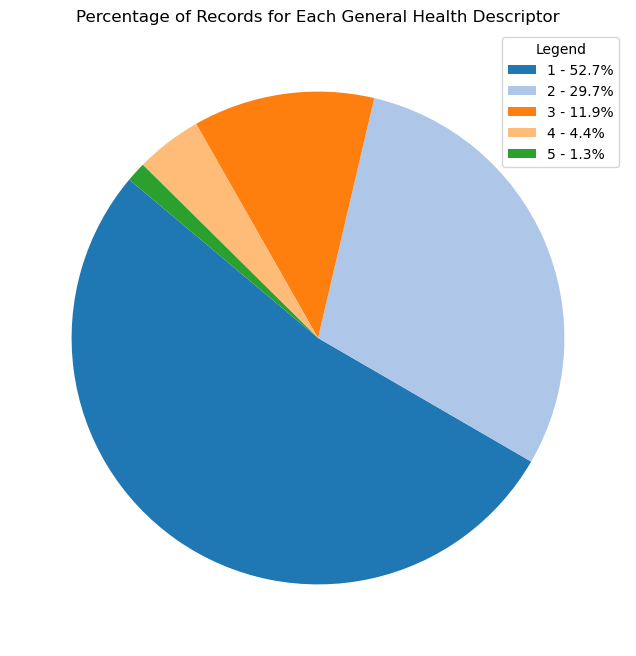

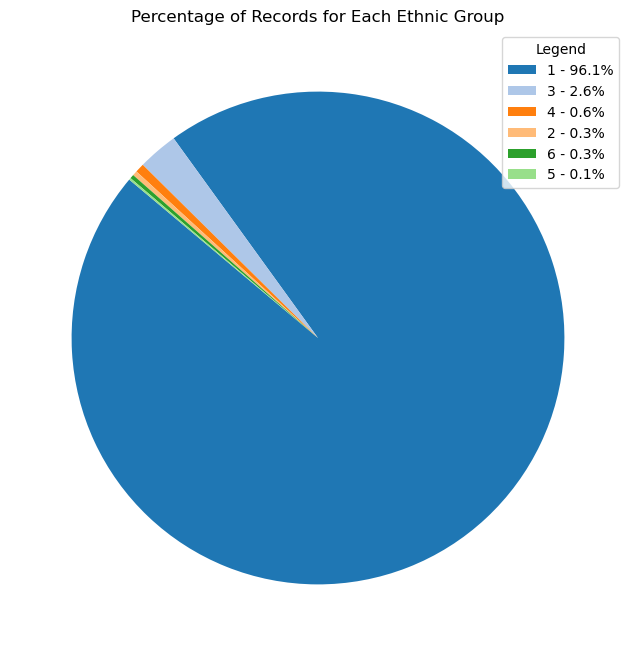

In [17]:
import matplotlib.pyplot as plt

# Pie chart for general health
def plot_pie_chart_with_legend(data, column, title):
    """
    Generate a pie chart with percentages displayed in the legend.
    
    Args:
        data (DataFrame): Dataset containing the column.
        column (str): Column name for pie chart.
        title (str): Title for the pie chart.
    """
    values = data[column].value_counts()
    labels = values.index
    sizes = values.values

    # Create the pie chart
    plt.figure(figsize=(8, 8))
    wedges, _ = plt.pie(sizes, startangle=140, colors=plt.cm.tab20.colors[:len(labels)])
    
    # Create the legend with percentages
    legend_labels = [f"{label} - {size / sum(sizes) * 100:.1f}%" for label, size in zip(labels, sizes)]
    plt.legend(wedges, legend_labels, title="Legend", loc="best")
    plt.title(title)
    plt.show()

# Generate pie chart for "health" (general health descriptor)
plot_pie_chart_with_legend(refined_data, "health", "Percentage of Records for Each General Health Descriptor")

# Generate pie chart for "Ethnic_Group"
plot_pie_chart_with_legend(refined_data, "Ethnic_Group", "Percentage of Records for Each Ethnic Group")


# Generating Summary Tables
- number of records by hours worked per week and industry;
- number of records by occupation and approximate social grade.

Tables generated and saved as 'hours_worked_industry.csv' and 'occupation_social_grade.csv'

Table: Number of Records by Hours Worked Per Week and Industry
industry                 1    10    11   12   13     2     3     4    5     6  \
Hours_Worked_Per_Week                                                           
1                       21   230   259  103   83    58    44   619  331    72   
2                       49   661  1518  183  225   201   166  1318  635   371   
3                      191  1377  2591  354  362  2533  1801  2255  738  1555   
4                      258   253   184   57   60   559   427   411  230   432   

industry                  7     8     9  
Hours_Worked_Per_Week                    
1                        34   230    59  
2                       224   639   328  
3                      1048  1936  1592  
4                       117   425   130  


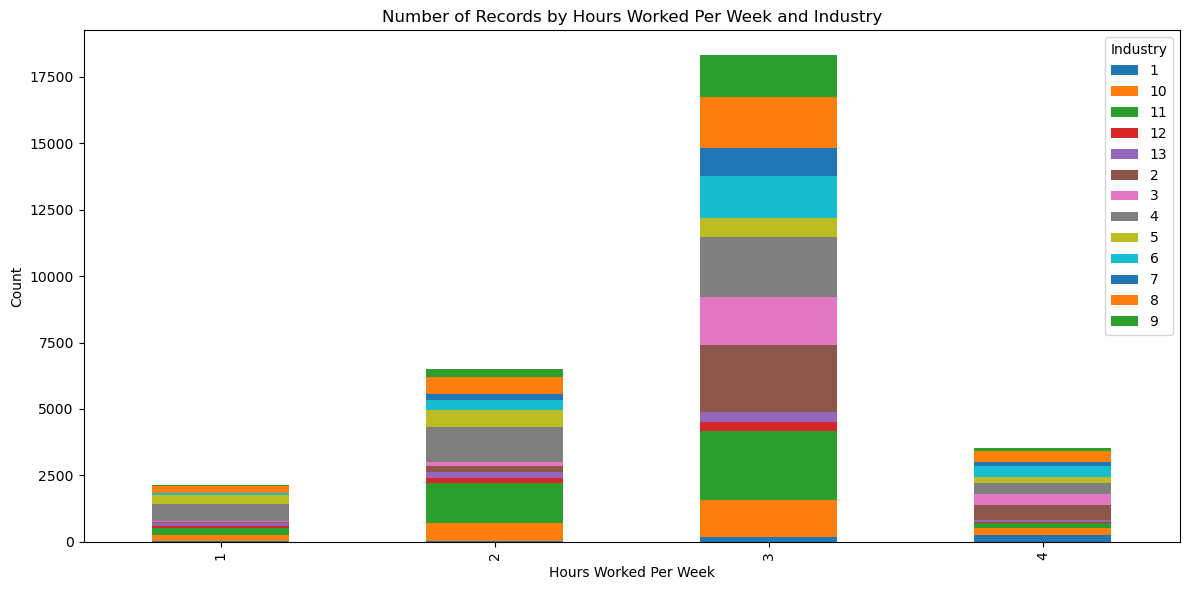


Table: Number of Records by Occupation and Approximate Social Grade
Approximate_Social_Grade     1     2     3     4
Occupation                                      
1                         1413  1686   213   192
2                         4739  1670   465   289
3                          933  3336   377   280
4                          707  3883   816   538
5                          218   612  4056  1176
6                          324   897  1530  1679
7                          381  1393   870  2172
8                           98   367  1619  2183
9                          247   933  1196  4675


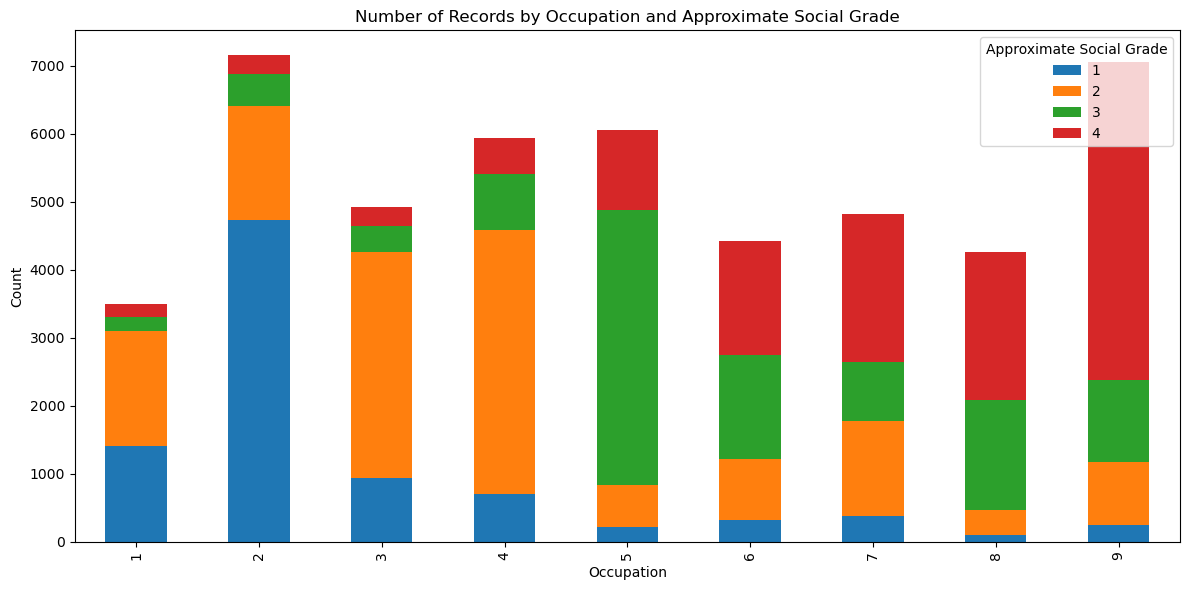

In [16]:
import pandas as pd

# Generate the tables
# Number of records by Hours Worked Per Week and Industry
hours_worked_industry = refined_data.groupby(["Hours_Worked_Per_Week", "industry"]).size().unstack(fill_value=0)

# Number of records by Occupation and Approximate Social Grade
occupation_social_grade = refined_data.groupby(["Occupation", "Approximate_Social_Grade"]).size().unstack(fill_value=0)

# Save the tables to CSV
hours_worked_industry.to_csv("../data/hours_worked_industry.csv", index=True)
occupation_social_grade.to_csv("../data/occupation_social_grade.csv", index=True)

print("Tables generated and saved as 'hours_worked_industry.csv' and 'occupation_social_grade.csv'")

# 1. Table and Bar Chart for Hours Worked Per Week and Industry
print("\nTable: Number of Records by Hours Worked Per Week and Industry")
print(hours_worked_industry)

hours_worked_industry.plot(kind="bar", figsize=(12, 6), stacked=True, legend=True)
plt.title("Number of Records by Hours Worked Per Week and Industry")
plt.xlabel("Hours Worked Per Week")
plt.ylabel("Count")
plt.legend(title="Industry")
plt.tight_layout()
plt.show()

# 2. Table and Bar Chart for Occupation and Approximate Social Grade
print("\nTable: Number of Records by Occupation and Approximate Social Grade")
print(occupation_social_grade)

occupation_social_grade.plot(kind="bar", figsize=(12, 6), stacked=True, legend=True)
plt.title("Number of Records by Occupation and Approximate Social Grade")
plt.xlabel("Occupation")
plt.ylabel("Count")
plt.legend(title="Approximate Social Grade")
plt.tight_layout()
plt.show()

# Analysis of Economic Activity and Working Hours

This section analyzes the dataset to derive insights related to:
1. The number of economically active people grouped by age.
2. The number of economically inactive people grouped by health descriptor.
3. The distribution of total working hours per week for students.

In [22]:
import pandas as pd
# 1. Number of economically active people depending on age
economically_active_codes = ['1', '2', '3', '4', '5', '6', '7', '8', '9']
economically_active_by_age = data[data["Economic_Activity"].isin(economically_active_codes)].groupby("age").size()
print("Economically Active People by Age:\n", economically_active_by_age)

# 2. Number of economically inactive people depending on health
economically_inactive_codes = ['X']  # Assuming 'X' represents inactive or missing data
economically_inactive_by_health = data[data["Economic_Activity"].isin(economically_inactive_codes)].groupby("health").size()
print("\nEconomically Inactive People by Health:\n", economically_inactive_by_health)

# 3. Total number of working hours per week for students (codes 4 and 6 in "Economic Activity")
student_codes = ['4', '6']
students_hours_worked = refined_data[refined_data["Economic_Activity"].isin(student_codes)].groupby("Hours_Worked_Per_Week").size()
print("\nHours Worked Per Week by Students:\n", students_hours_worked)


Economically Active People by Age:
 age
2    7541
3    8056
4    8963
5    9336
6    7854
7    5731
8    4927
dtype: int64

Economically Inactive People by Health:
 health
1    9147
2    1567
3     213
4      38
5      15
dtype: int64

Hours Worked Per Week by Students:
 Hours_Worked_Per_Week
1    792
2    490
3    244
4     38
dtype: int64


# Interactive Data Visualization

This section of the notebook introduces an **interactive plot** to explore the distribution of economic activity based on:
1. Selected health descriptors.
2. A specified age range.

The use of interactive widgets allows users to dynamically adjust the parameters and immediately visualize the corresponding data, improving the accessibility and usability of the analysis.


In [26]:
import pandas as pd
import matplotlib.pyplot as plt
from ipywidgets import interact, widgets

# Function to filter data and plot based on user inputs
def plot_interactive(health_descriptor, age_range):
    """
    Plot the distribution of records for selected health descriptor and age range.
    """
    age_min, age_max = age_range  # Unpack the age range tuple
    filtered_data = refined_data[
        (refined_data["health"] == health_descriptor) &
        (refined_data["age"] >= age_min) &
        (refined_data["age"] <= age_max)
    ]
    
    plt.figure(figsize=(10, 6))
    filtered_data["Economic_Activity"].value_counts().plot(kind="bar", color="skyblue", alpha=0.7)
    plt.title(f"Distribution of Economic Activity for Health {health_descriptor} and Age {age_min}-{age_max}")
    plt.xlabel("Economic Activity")
    plt.ylabel("Count")
    plt.grid(axis="y", linestyle="--", alpha=0.6)
    plt.show()

# Create interactive widgets
health_dropdown = widgets.Dropdown(
    options=sorted(refined_data["health"].dropna().unique()),
    value=1,
    description="Health:"
)

age_slider = widgets.IntRangeSlider(
    value=[1, 8],
    min=1,
    max=8,
    step=1,
    description="Age Range:"
)

# Create interactive plot
interact(plot_interactive, health_descriptor=health_dropdown, age_range=age_slider);


interactive(children=(Dropdown(description='Health:', options=(np.int64(1), np.int64(2), np.int64(3), np.int64…

# Notebook Conversion to HTML

This script automates the process of converting a Jupyter Notebook into an HTML report using the `nbconvert` utility. The resulting HTML file combines code, visualizations, and Markdown explanations in a single, shareable document.

In [14]:
import subprocess
import os

def convert_notebook_to_html(notebook_path, output_path):
    import subprocess
    try:
        result = subprocess.run([
            "jupyter", "nbconvert",
            "--to", "html",
            "--output", output_path,
            notebook_path
        ], check=True, capture_output=True, text=True)
        print(f"Conversion successful! HTML report saved to: {output_path}")
    except subprocess.CalledProcessError as e:
        print(f"Error during conversion:\nCommand: {e.cmd}\nReturn Code: {e.returncode}")
        print(f"STDOUT:\n{e.stdout}")
        print(f"STDERR:\n{e.stderr}")
        raise

if __name__ == "__main__":
    # Input and output paths
    notebook_file = "../notebooks/census2011.ipynb"  # Replace with your notebook name
    output_file = "./data_analysis_report.html"    # Replace with your desired HTML output name
    
    # Convert the notebook to HTML
    convert_notebook_to_html(notebook_file, output_file)

Conversion successful! HTML report saved to: ./data_analysis_report.html
